In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import r2_score, confusion_matrix, classification_report,accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("Admission_Predict.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.drop("Serial No.", axis=1, inplace=True)

In [4]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [6]:
df.describe()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [7]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [9]:
df[df["Chance of Admit "] >= 0.70] = 1 
df[df["Chance of Admit "] < 0.70] = 0

In [10]:
df["Chance of Admit "].value_counts()

Chance of Admit 
1.0    247
0.0    153
Name: count, dtype: int64

In [11]:
X = df.drop("Chance of Admit ", axis=1)

In [12]:
y = df["Chance of Admit "]

In [13]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [14]:
X_train.shape, X_test.shape

((300, 7), (100, 7))

In [15]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="entropy", max_depth=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [16]:
y_test

209    0.0
280    0.0
33     1.0
210    1.0
93     0.0
      ... 
314    0.0
373    1.0
380    1.0
239    0.0
75     1.0
Name: Chance of Admit , Length: 100, dtype: float64

In [17]:
y_pred

array([0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1.])

In [18]:
matrix=confusion_matrix(y_test,y_pred,labels=[0.0,1.0])
matrix

array([[41,  0],
       [ 0, 59]], dtype=int64)

In [19]:
acc = accuracy_score(y_test,y_pred)
print('Accuracy of Decision Tree model =  ',acc)

Accuracy of Decision Tree model =   1.0


In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        41
         1.0       1.00      1.00      1.00        59

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [21]:
feature_names=df.columns[0:7]
print(feature_names,end=' ')
class_names=[str(x) for x in model.classes_]
class_names

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object') 

['0.0', '1.0']

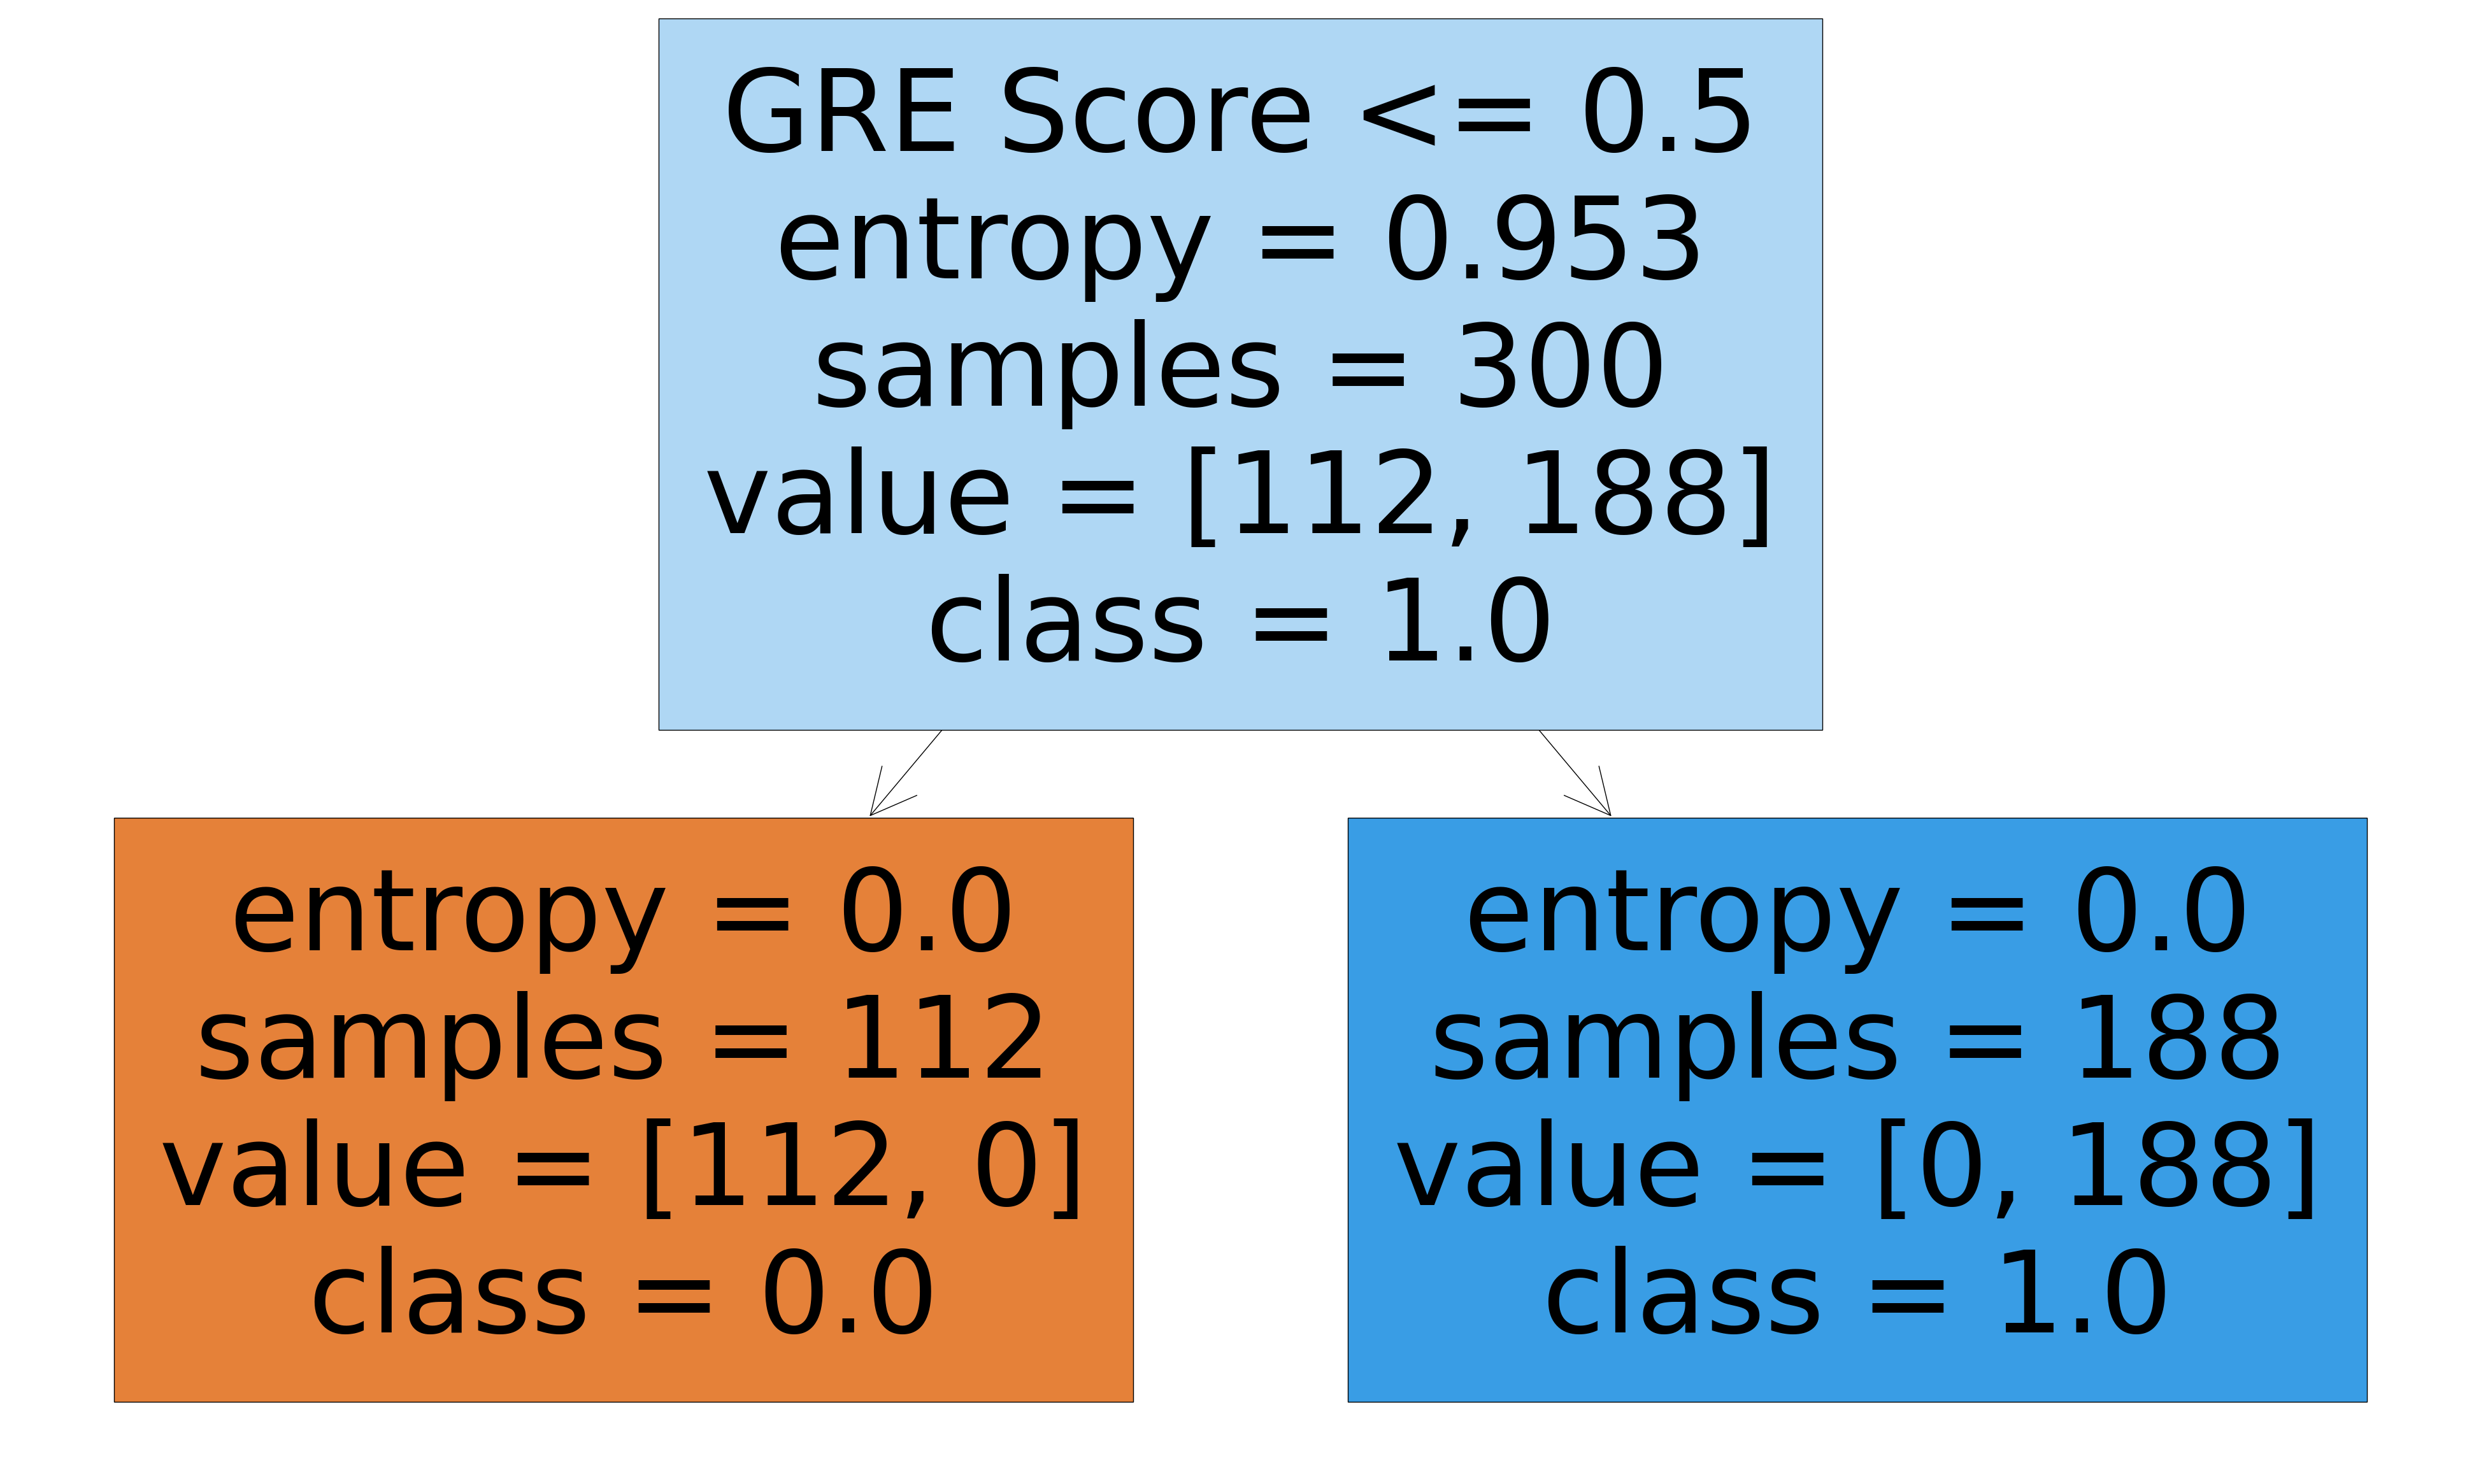

In [22]:
from sklearn.tree import plot_tree
fig=plt.figure(figsize=(50,30))
plot_tree(model,feature_names=feature_names,class_names=class_names,filled=True)
plt.savefig('tree_visualization.png')